## TF tunner samples

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
from processing import load_image_dataset
x_rgb_train, y_rgb_train = load_image_dataset('Datasets/espe/masked/train', (40, 40), False)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/espe/masked/test', (40, 40), False)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/espe/masked/validation', (40, 40), False)

In [4]:
from processing import slice_labels
x_masks_train, y_masks_train = load_image_dataset('Datasets/espe/masks/train', (40, 40), False)
x_masks_test, y_masks_test = load_image_dataset('Datasets/espe/masks/test', (40, 40), False)
x_masks_validation, y_masks_validation = load_image_dataset('Datasets/espe/masks/validation', (40, 40), False)

In [7]:
x_rgb_train.shape, x_masks_train.shape

((10969, 40, 40, 3), (10507, 40, 40, 3))

In [5]:
import numpy as np
x_masks, y_masks = np.concatenate((x_masks_train, x_masks_validation), axis=0), np.concatenate((y_masks_train, y_masks_validation), axis=0)
x_data, y_data = np.concatenate((x_rgb_train, x_rgb_validation), axis=0), np.concatenate((y_rgb_train, y_rgb_validation), axis=0)

In [6]:
#x_masks.shape == x_data.shape, y_masks.shape == y_data.shape
print(x_masks.shape)
print(x_data.shape)
print(y_masks.shape)
print(y_data.shape)
x_masks.shape == x_data.shape, y_masks.shape == y_data.shape

(566, 40, 40, 3)
(566, 40, 40, 3)
(566, 7)
(566, 7)


(True, True)

In [8]:
from utils.Models import image_branch
a =image_branch((40,40,3))
    #b = silhouette_features_branch()
c = cnn()

fussion = keras.layers.concatenate([a.output, c.output])
d = keras.layers.Dense(800, activation='relu')(fussion)
d = keras.layers.Dropout(0.8)(d)
d = keras.layers.Dense(800, activation='relu')(d)
d = keras.layers.Dropout(0.8)(d)
d = keras.layers.Dense(7, activation='softmax')(d)
model = keras.models.Model(inputs=[a.input, c.input], outputs=d)
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimization_function = tf.keras.optimizers.RMSprop(lr=1e-4)
model.compile(loss=loss_function, optimizer=optimization_function, metrics=['acc'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
from training.utils import cv_training
cv_training(model = model , x_data=[x_masks,x_data], y_data=y_data,path_to_save_results='RESULTADOS')

c:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
c:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
c:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a depr

Train on 301 samples, validate on 76 samples
Epoch 1/30
301/301 [==============================] - 2s 6ms/sample - loss: 2.8911 - acc: 0.1728 - val_loss: 45.1917 - val_acc: 0.1711
Epoch 2/30
301/301 [==============================] - 1s 3ms/sample - loss: 1.9083 - acc: 0.3654 - val_loss: 31.0914 - val_acc: 0.1579
Epoch 3/30
301/301 [==============================] - 1s 3ms/sample - loss: 1.1293 - acc: 0.5847 - val_loss: 33.2901 - val_acc: 0.2895
Epoch 4/30
301/301 [==============================] - 1s 3ms/sample - loss: 0.8520 - acc: 0.6777 - val_loss: 34.7359 - val_acc: 0.2895
Epoch 5/30
301/301 [==============================] - 1s 3ms/sample - loss: 0.6921 - acc: 0.7243 - val_loss: 34.6994 - val_acc: 0.2895
Epoch 6/30
301/301 [==============================] - 1s 4ms/sample - loss: 0.5583 - acc: 0.8040 - val_loss: 31.7573 - val_acc: 0.2763
Epoch 7/30
301/301 [==============================] - 1s 3ms/sample - loss: 0.3715 - acc: 0.8771 - val_loss: 28.6213 - val_acc: 0.2105
Epoch 8/30

OSError: Unable to create file (unable to open file: name = 'RESULTADOS', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

<Figure size 432x288 with 0 Axes>

In [10]:
model.evaluate(x=[[x_rgb_test[0]], [x_masks_test[0]]], y=y_masks_test[:1, :])

1/1 [==============================] - 0s 4ms/sample - loss: 67.5226 - acc: 0.0000e+00


[67.5225830078125, 0.0]

# Pamela

In [1]:
from utils.Models import individual_feature_model
model = individual_feature_model((40, 40, 1))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


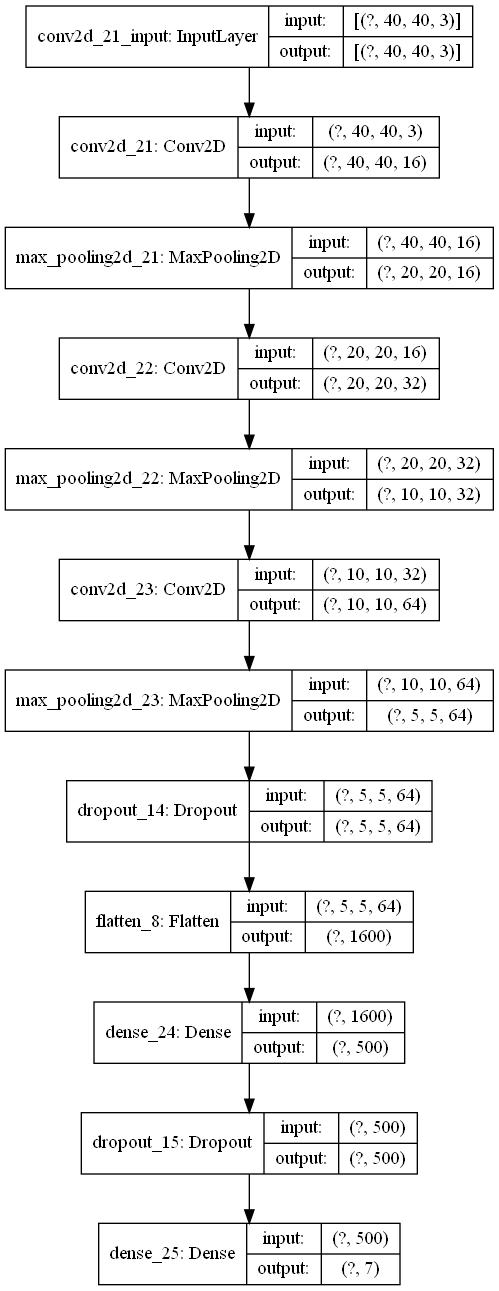

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
model = load_model('models/own/experiments/Pamela/silueta_2/experiment_1/model_3.h5')
plot_model(model, show_shapes=True)